In [41]:
import seaborn as sns

In [2]:
import json
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
%cd C:\Users\Karunakaran\Desktop\Capstone
Data = 'C:\Users\Karunakaran\Desktop\Capstone\tags.json'
df_tags = pd.read_json('tags.json')
%cd C:\Users\Karunakaran\Desktop\Capstone\Data
targetdir = 'C:\Users\Karunakaran\Desktop\Capstone\Data'
filelist = os.listdir(targetdir) 
filelist
df_json  = pd.DataFrame()
for f in filelist:
    df = pd.read_json(f,orient='split')
    df_json = df_json.append(df,ignore_index=True)
df_template = pd.DataFrame(pd.DataFrame(df_tags.T['template'].reset_index()))
df_json_temp = pd.merge(df_json,df_template,left_on='sensor_id',right_on='index')[['sensor_id','template','room','values','sensor_value']]

C:\Users\Karunakaran\Desktop\Capstone
C:\Users\Karunakaran\Desktop\Capstone\Data


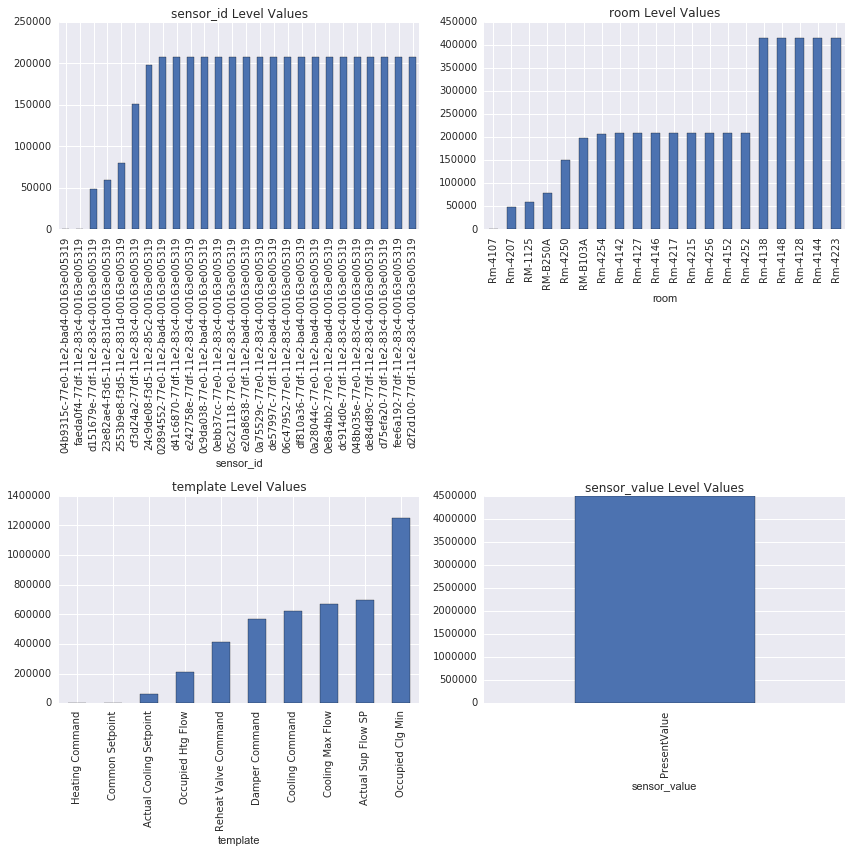

In [42]:
fig, axes = plt.subplots(figsize=(12,12),nrows=2, ncols=2)
df_plt = df_json_temp[['sensor_id','values']].groupby(['sensor_id']).count().sort_values(['values'],ascending=True)
df_plt.plot(kind = 'bar',title='%s Level Values' %('sensor_id'),legend=False,ax=axes[0,0])     
df_plt = df_json_temp[['room','values']].groupby(['room']).count().sort_values(['values'],ascending=True)
df_plt.plot(kind = 'bar',title='%s Level Values' %('room'),legend=False,ax=axes[0,1])     
df_plt = df_json_temp[['template','values']].groupby(['template']).count().sort_values(['values'],ascending=True)
df_plt.plot(kind = 'bar',title='%s Level Values' %('template'),legend=False,ax=axes[1,0])     
df_plt = df_json_temp[['sensor_value','values']].groupby(['sensor_value']).count().sort_values(['values'],ascending=True)
df_plt.plot(kind = 'bar',title='%s Level Values' %('sensor_value'),legend=False,ax=axes[1,1])     
plt.tight_layout()